## Kaggle Machine Learning and Data Science Survey Challenge

The objectives of this notebook is to explore the survey data to understand (1) the nature of women’s
representation in Data Science and Machine Learning and (2) the effects of education on income level. The
following tasks are completed:
1. Perform exploratory data analysis to analyze the survey dataset and to summarize its main
characteristics. Present graphical figures that represent different trends in the data.
2. Comparing the difference between average salary of males vs. females using t-test for hypothesis testing.
3. Comparing the difference between average salary of different education catetgories using ANOVA test for hypothesis testing

In [1]:
#import relevent python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
    import statsmodels.api as sm
from scipy import stats

In [2]:
# read data and print a sample
data = 'C:\\Users\KrishnaPratheeba\Documents\MEngCEM\MIE1624 Data science and analytics\Assignment 1\clean_kaggle_data.csv'
df = pd.read_csv(data)
df.head()

C:\Users\KrishnaPratheeba\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (74,78,115,147,154,172,176,213,225,229,232) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
3,4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,5,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,...,NaN,NaN,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1


In [3]:
# extract relevent attributes and print a sample
df1 = df[['Q3','Q1','Q4','Q5','Q10','Q15','Q23']]
df1.columns= ['Country','Age','Education','Designation','Salary','CodingEx','MLEx']
df1.head()

,Country,Age,Education,Designation,Salary,CodingEx,MLEx
0,France,22-24,Master’s degree,Software Engineer,40000,1-2 years,1-2 years
1,India,40-44,Professional degree,Software Engineer,7500,I have never written code,NaN
2,Australia,40-44,Master’s degree,Other,300000,1-2 years,2-3 years
3,India,22-24,Bachelor’s degree,Other,5000,< 1 years,< 1 years
4,France,50-54,Master’s degree,Data Scientist,70000,20+ years,10-15 years


In [4]:
df1.describe()

,Salary
count,12497.000000
mean,57124.189806
std,73710.709307
min,1000.000000
25%,7500.000000
50%,30000.000000
75%,80000.000000
max,500000.000000


In [97]:
print("Mean salary of data scientists is ", df1["Salary"].mean(), "and the standard deviation is ", df1["Salary"].std())

Mean salary of data scientists is  57124.18980555333 and the standard deviation is  73710.7093071757


## Part 1 - visualisation

### Figure 1 - Boxplot showing salary statistics grouped by education 

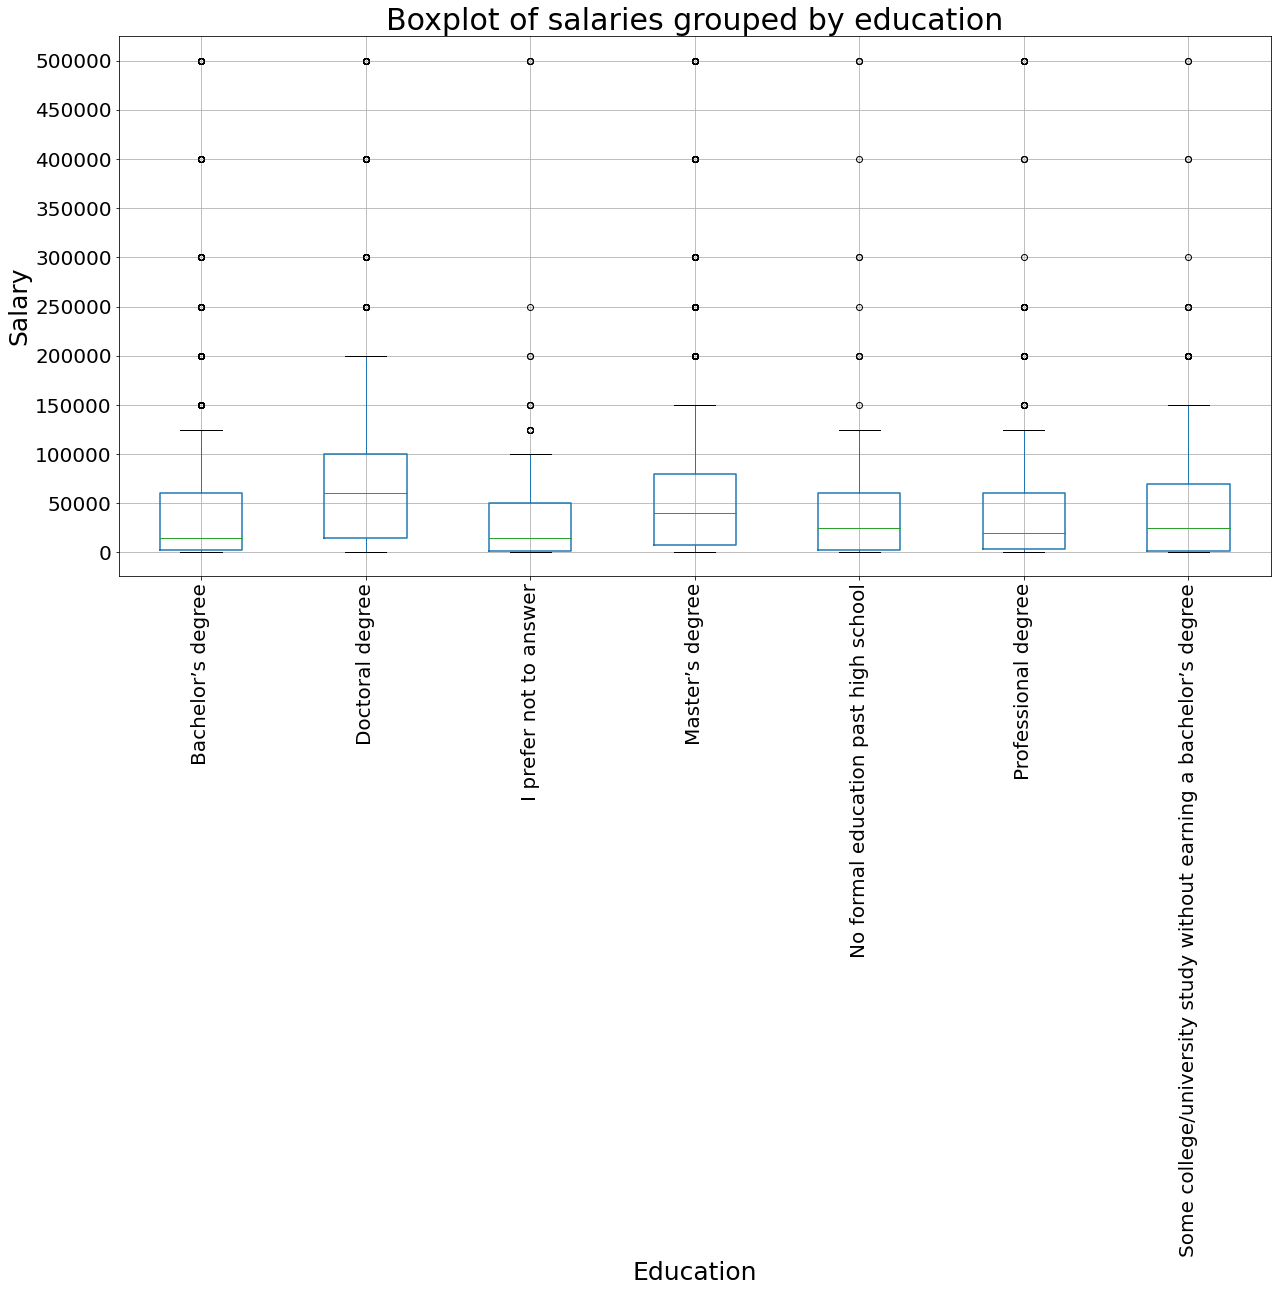

In [94]:
boxprops = dict(linewidth=1.5)
df1.boxplot(column='Salary', by='Education', grid=True, figsize=(20,10), boxprops=boxprops)
plt.xticks(rotation=90, size=20)
plt.yticks(np.arange(0,500001,50000), size=20)
plt.title('Boxplot of salaries grouped by education', size=30)
plt.xlabel('Education', size =25)
plt.ylabel('Salary', size=25)
plt.suptitle('')
plt.show()

#### Data preparation for stacked bar chart of the categorical variables Experience and Age

In [8]:
df1['Age'].value_counts() # counting each age cohort
Agecode = {'18-21': 1, '22-24': 2, '25-29': 3, '30-34': 4, '35-39': 5, '40-44': 6, '45-49': 7, '50-54': 8, '55-59': 9, '60-69': 10, '70+':11} #renaming each age cohort 
Agecohort = df1['Age'].replace(Agecode) #replacing names of each age cohort
Agecohort.value_counts() # verifying the age cohort names and counts

3     3075
4     2429
5     1690
2     1652
6     1176
7      788
8      582
1      442
9      330
10     262
11      71
Name: Age, dtype: int64

In [9]:
df1['CodingEx'].value_counts() #counting values of each category of coding experience

3-5 years                    2818
1-2 years                    2713
< 1 years                    2049
5-10 years                   1749
10-20 years                  1004
I have never written code     552
20+ years                     537
Name: CodingEx, dtype: int64

In [10]:
#categorising coding experience for each age cohort
Exp_cohort1 = Agecohort[df1['CodingEx'] == 'I have never written code'].dropna()
Exp_cohort2 = Agecohort[df1['CodingEx'] == '< 1 years'].dropna()
Exp_cohort3 = Agecohort[df1['CodingEx'] == '1-2 years'].dropna()
Exp_cohort4 = Agecohort[df1['CodingEx'] == '3-5 years'].dropna()
Exp_cohort5 = Agecohort[df1['CodingEx'] == '5-10 years'].dropna()
Exp_cohort6 = Agecohort[df1['CodingEx'] == '10-20 years'].dropna()
Exp_cohort7 = Agecohort[df1['CodingEx'] == '20+ years'].dropna()
len(Exp_cohort1)

552

In [11]:
#calculating the count values for each categorised age cohort
Exp_freq1 = Exp_cohort1.value_counts()
Exp_freq2 = Exp_cohort2.value_counts()
Exp_freq3 = Exp_cohort3.value_counts()
Exp_freq4 = Exp_cohort4.value_counts()
Exp_freq5 = Exp_cohort5.value_counts()
Exp_freq6 = Exp_cohort6.value_counts()
Exp_freq7 = Exp_cohort7.value_counts()
Exp_freq1 # shows how many people are in each age cohort whose coding experience correspond to 'I have never written code'

3     118
4      94
5      79
2      62
6      54
7      51
8      33
1      28
10     17
9      12
11      4
Name: Age, dtype: int64

In [12]:
#showing age vs experience matrix
data1 = pd.DataFrame({'I have never written code': Exp_freq1, '< 1 years': Exp_freq2, '1-2 years': Exp_freq3, '3-5 years': Exp_freq4, '5-10 years': Exp_freq5, '10-20 years': Exp_freq6, '20+ years': Exp_freq7})
data1 # 1,2,3,...,11 are the age cohort

,I have never written code,< 1 years,1-2 years,3-5 years,5-10 years,10-20 years,20+ years
1,28,135,153,48,5,2,2
2,62,437,565,357,44,3,2
3,118,537,799,970,348,19,4
4,94,310,471,622,606,168,3
5,79,242,264,321,349,299,19
6,54,158,191,193,167,251,74
7,51,111,116,134,90,132,87
8,33,68,66,101,59,67,135
9,12,29,48,37,44,36,93
10,17,17,31,30,29,23,91


In [13]:
#transpose the matrix
data2 = data1.transpose()
data2

,1,2,3,4,5,6,7,8,9,10,11
I have never written code,28,62,118,94,79,54,51,33,12,17,4
< 1 years,135,437,537,310,242,158,111,68,29,17,5
1-2 years,153,565,799,471,264,191,116,66,48,31,9
3-5 years,48,357,970,622,321,193,134,101,37,30,5
5-10 years,5,44,348,606,349,167,90,59,44,29,8
10-20 years,2,3,19,168,299,251,132,67,36,23,4
20+ years,2,2,4,3,19,74,87,135,93,91,27


### Figure 2 - Plotting the stacked bar graph of Experience vs Age

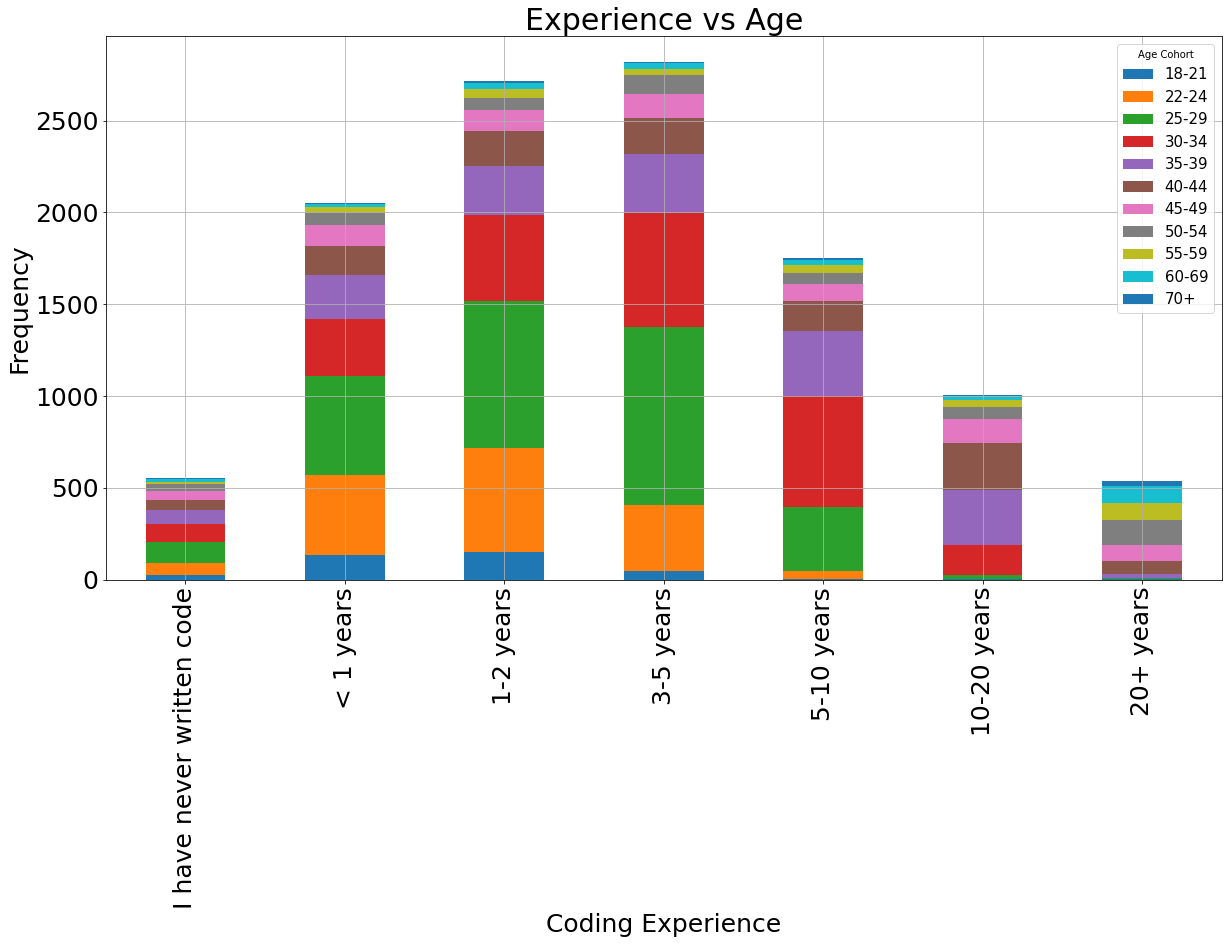

In [95]:
data2.plot(kind="bar", stacked=True, figsize=(20,10), grid=True)
plt.legend(Agecode,bbox_to_anchor=(1, 1), prop={'size':15}, title='Age Cohort')
plt.title('Experience vs Age', size=30)
plt.ylabel('Frequency', size=25)
plt.xlabel('Coding Experience', size=25)
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

### Figure 3 - scatter plot to show the distribution of number of data scientists from each country and their respective average salaries

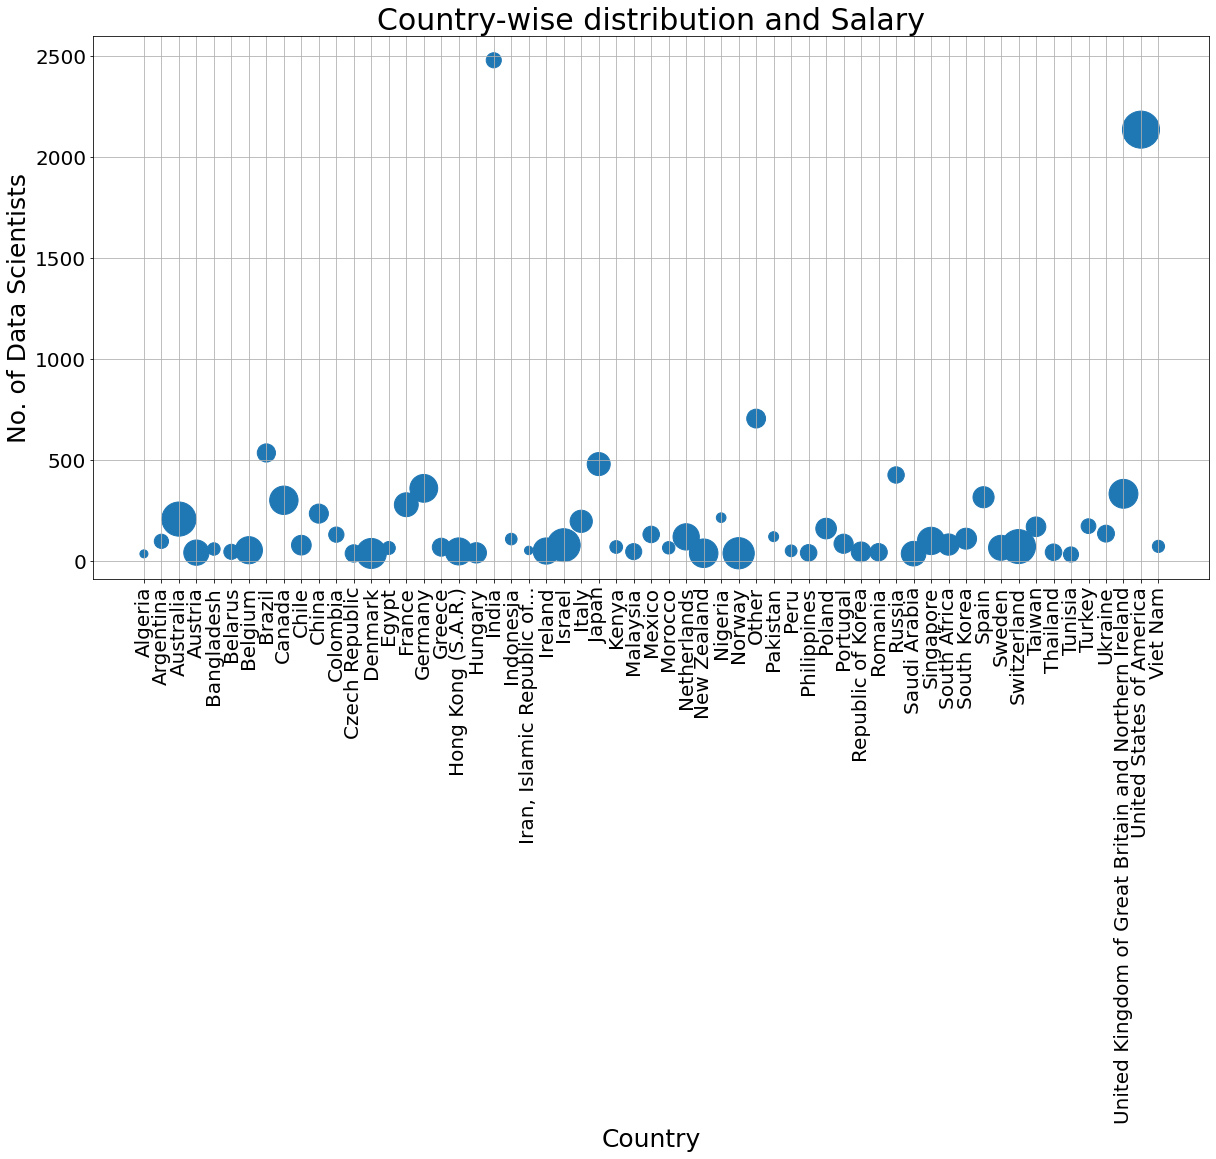

In [89]:
#plotting a scatter plot, where the size of the bubble represents the average salary of each country and the distribution of
#number of data scientists is shown on the y-axis for each country

Countries = df1.groupby(['Country']).size() #grouping data by countries
Country_count = Countries.to_dict() # creating dictionary of countries and their employees size
x = list(Country_count.keys()) #
y = list(Country_count.values())
Avg_salary = df1.groupby('Country').agg({'Salary':'mean'}) # calculating average salary of each country
Avg_salary1 = Avg_salary.to_dict() # creating dictionary of countries and their average salary
S = Avg_salary1['Salary']
S1 = list(S.values()) # extracting the salaries
S2 = [x*0.01 for x in S1] # setting the size of the scatter bubble based on average salary
plt.figure(figsize=(20,10))
plt.scatter(x,y,s=S2)
plt.title('Country-wise distribution and Salary',size = 30)
plt.xlabel('Country', size = 25)
plt.ylabel('No. of Data Scientists',size = 25)
plt.xticks(rotation='90',size = 20)
plt.yticks(size=20)
plt.grid()
plt.show()

## Performing statistical tests

## Part 2 - t-test
#### This method is adopted here to test the statistical significance of salary differences between male and female groups
#### Since there are only 2 gender categories considered here, this method is appropriate to use here

In [41]:
#Extract the desired data from original dataset and rename the columns
df2 = df[['Q3','Q2','Q1','Q4','Q5','Q10','Q15','Q23']]
df2.columns= ['Country','Gender','Age','Education','Designation','Salary','CodingEx','MLEx']
df2.head()

,Country,Gender,Age,Education,Designation,Salary,CodingEx,MLEx
0,France,Male,22-24,Master’s degree,Software Engineer,40000,1-2 years,1-2 years
1,India,Male,40-44,Professional degree,Software Engineer,7500,I have never written code,NaN
2,Australia,Male,40-44,Master’s degree,Other,300000,1-2 years,2-3 years
3,India,Male,22-24,Bachelor’s degree,Other,5000,< 1 years,< 1 years
4,France,Male,50-54,Master’s degree,Data Scientist,70000,20+ years,10-15 years


In [17]:
df3 = df2[['Gender','Salary']] #extract gender and salary data
df3.groupby('Gender').size() #group the extracted data by gender

Gender
Female                      1827
Male                       10473
Prefer not to say            167
Prefer to self-describe       30
dtype: int64

In [42]:
#retain only Female and Male responses and drop the rest of the rows
index = df3[df3['Gender'] == 'Prefer not to say'].index
df3.drop(index, axis=0, inplace=True)
index = df3[df3['Gender'] == 'Prefer to self-describe'].index
df3.drop(index, axis=0, inplace=True)
df3.groupby(['Gender']).size() # check to see if the irrelevent rows are dropped

C:\Users\KrishnaPratheeba\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Gender
Female     1827
Male      10473
dtype: int64

In [20]:
df3.groupby(['Gender']).mean() #calculate mean salaries of male and female gender types

,Salary
Gender,
Female,45933.771210
Male,58709.586556


### Performing t-test

In [21]:
#perform t-test to check the statistical significance of the difference in mean salaries between men and women
Female_salary = df3[df3['Gender']=='Female']['Salary'] # extracting female salaries from df3
Male_salary = df3[df3['Gender']=='Male']['Salary'] #extracting male salaries from df3
tc, pc = stats.ttest_ind(Female_salary, Male_salary) #performing t-test using stats module from scipy package
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -6.90935  p = 5.10894e-12


### We conclude that the difference in salaries for men and women are statistically significant since p value 5.10894e-12 is lesser than 0.05

### Bootstrapping the salary data to perform t-test on the bootstrapped distribution of mean salaries of the two gender types

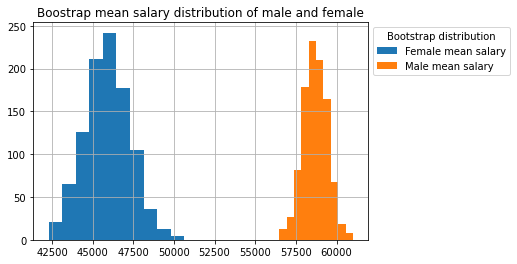

In [87]:
#bootstrapping male and female salary with replacement and plotting the histogram of mean salary
bootstrap_fem_sal = pd.DataFrame([Female_salary.sample(1827,replace=True).mean() for i in range(1000)])
bootstrap_fem_sal = bootstrap_fem_sal[0]
bootstrap_fem_sal.hist()
bootstrap_male_sal = pd.DataFrame([Male_salary.sample(10473,replace=True).mean() for i in range(1000)])
bootstrap_male_sal = bootstrap_male_sal[0]
bootstrap_male_sal.hist()
legend2 = ['Female mean salary', 'Male mean salary']
plt.legend(legend2, title='Bootstrap distribution', bbox_to_anchor=(1,1))
plt.title("Boostrap mean salary distribution of male and female")
plt.show()

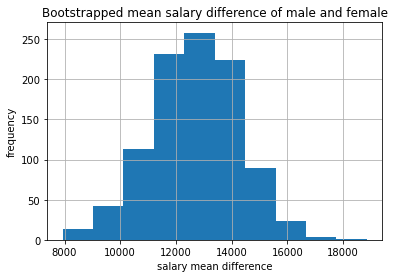

In [86]:
#plotting the histogram distribution of the difference in bootstrapped mean salaries male and female salaries
difference_mean = bootstrap_male_sal - bootstrap_fem_sal
difference_mean.hist()
plt.title("Bootstrapped mean salary difference of male and female")
plt.xlabel("salary mean difference")
plt.ylabel("frequency")
plt.show()

In [43]:
print("Mean salary of male bootstrapped data is ", bootstrap_male_sal.mean(), "\nMean salary of female bootstrapped data is", bootstrap_fem_sal.mean())

Mean salary of male bootstrapped data is  0    58716.477657
dtype: float64 
Mean salary of female bootstrapped data is 0    45964.485222
dtype: float64


In [74]:
#performing the t-test on the bootstrapped mean to find the significance of the difference in salaries between men and women
tc, pc = stats.ttest_ind(bootstrap_fem_sal, bootstrap_male_sal)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -255.024  p = 0


### We conclude that the difference between bootstrapped mean of men and women salaries are statistically significant since p value 0 is lesser than 0.05

## Part 3 - Anova testing
#### This method is adopted here to test the statistical significance of salary differences between education categories
#### Since there are three categories in education, ANOVA method is adopted here

In [26]:
#grouping education categories by its volume to see the distribution
df2.groupby('Education').size()

Education
Bachelor’s degree                                                    3361
Doctoral degree                                                      2083
I prefer not to answer                                                184
Master’s degree                                                      5868
No formal education past high school                                  125
Professional degree                                                   462
Some college/university study without earning a bachelor’s degree     414
dtype: int64

In [27]:
#extracting salaries for three types of education category, namely Bachelor's, Master's and Doctoral
Bach_salary = df2[df2['Education']== "Bachelor’s degree"]['Salary']
Mast_salary = df2[df2['Education']== "Master’s degree"]['Salary']
Doct_salary = df2[df2['Education']== "Doctoral degree"]['Salary']
Bach_salary.head()

3       5000
6      90000
9      80000
12      1000
16    150000
Name: Salary, dtype: int64

In [28]:
#printing the mean salary of the three education category
print('Mean salary for bachelor degree is ', Bach_salary.mean(), '\nMean salary for master degree is ', Mast_salary.mean(), '\nMean salary for doctoral degree is ', Doct_salary.mean())

Mean salary for bachelor degree is  44999.25617375781 
Mean salary for master degree is  58778.62985685072 
Mean salary for doctoral degree is  75761.40182429188


#### Performing one way anova test to see the statistical significance of education and salary

In [29]:
stats.f_oneway(Bach_salary, Mast_salary, Doct_salary)

F_onewayResult(statistic=117.83927746561439, pvalue=2.233668506153945e-51)

#### We conclude that the difference in salaries for different education categories are statistically significant since p value 2.233668506153945e-51 is lesser than 0.05

### Applying anova test for bootstrapped salary and education data

In [63]:
#Bootstrapping all three education types with replacement and with equal samples of their 
#respective sample size to find the mean salary with 1000 iterations
bootstrap_bach = pd.DataFrame([Bach_salary.sample(3361,replace=True).mean() for i in range(1000)])
bootstrap_mast = pd.DataFrame([Mast_salary.sample(5868,replace=True).mean() for i in range(1000)])
bootstrap_doct = pd.DataFrame([Doct_salary.sample(2083,replace=True).mean() for i in range(1000)])
bootstrap_bach = bootstrap_bach[0]
bootstrap_mast = bootstrap_mast[0]
bootstrap_doct = bootstrap_doct[0]
print(bootstrap_bach.head())

0    45722.701577
1    45591.788158
2    44279.827432
3    45076.762868
4    44429.038976
Name: 0, dtype: float64


In [64]:
print("Mean salary of bootstrapped bachelor's degree data is ", bootstrap_bach.mean(), "\nMean salary of bootstrapped bachelor's degree data is ", bootstrap_mast.mean(), "\nMean salary of bootstrapped bachelor's degree data is ", bootstrap_doct.mean())

Mean salary of bootstrapped bachelor's degree data is  44984.64712883073 
Mean salary of bootstrapped bachelor's degree data is  58788.56535446487 
Mean salary of bootstrapped bachelor's degree data is  75836.91766682656


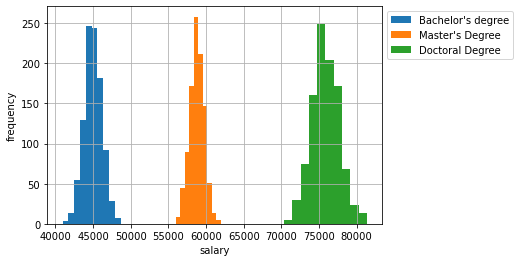

In [82]:
# Plotting the distribution of the bootstrapped data
legend = ["Bachelor's degree", "Master's Degree", "Doctoral Degree"]
bootstrap_bach.hist()
bootstrap_mast.hist()
bootstrap_doct.hist()
plt.legend(legend, bbox_to_anchor=(1,1))
plt.xlabel("salary")
plt.ylabel("frequency")
plt.show()

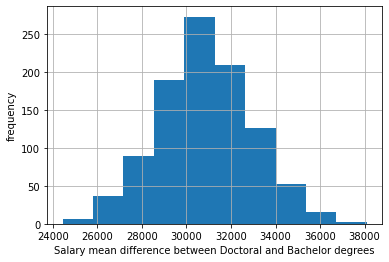

In [98]:
#finding the difference in mean for each pair of bootstrapped data
anova_bootstrap_db = bootstrap_doct - bootstrap_bach
anova_bootstrap_db.hist()
# legend1 = ["Doctoral and Bachelor", "Doctoral and Master", "Master and Bachelor"]
# plt.legend(legend1, title="Bootstrapped mean salary difference between groups", bbox_to_anchor=(1,1))
plt.xlabel("Salary mean difference between Doctoral and Bachelor degrees")
plt.ylabel("frequency")
plt.show()

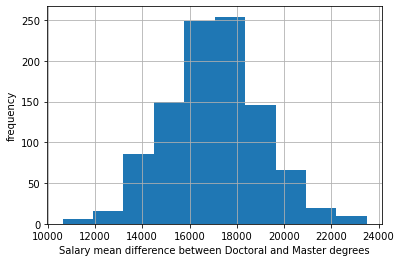

In [99]:
anova_bootstrap_dm = bootstrap_doct - bootstrap_mast
anova_bootstrap_dm.hist()
plt.xlabel("Salary mean difference between Doctoral and Master degrees")
plt.ylabel("frequency")
plt.show()

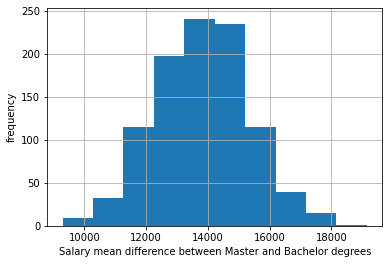

In [100]:
anova_bootstrap_mb = bootstrap_mast - bootstrap_bach
anova_bootstrap_mb.hist()
plt.xlabel("Salary mean difference between Master and Bachelor degrees")
plt.ylabel("frequency")
plt.show()

In [67]:
#performing one way anova test for the bootstrapped data
anova_bootstrap = stats.f_oneway(bootstrap_bach,bootstrap_mast, bootstrap_doct)
print(anova_bootstrap)

F_onewayResult(statistic=130928.04898047229, pvalue=0.0)


### We conclude that the difference in bootstrapped mean salaries for different education categories are statistically significant since p value 0 is lesser than 0.05